# 과제#1. car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 이를 해결하고자 여러분들에게 예측 모델링을 의뢰하였습니다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	매장 지역 주민의 평균 소득(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


* 데이터
    * data : 학습과 검증용
    * test : **팀과제용** 입니다.
        * feature만 있습니다.
        * 운영에서 발생된 데이터로 간주하고, 예측한 후에 Kaggle에 업로드합니다.

* 주의사항
    * data 에 대해 수행한 전처리 코드를 **순서에 맞춰** test에도 적용해야 함.

## 0.환경준비

### 0.1 Import

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

import warnings
import platform
from matplotlib import font_manager, rc 
warnings.filterwarnings('ignore')

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")
plt.rcParams['axes.unicode_minus'] = False

### 0.2 Data Loading

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(300, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


* 아래 데이터는 **팀 과제**를 위해 필요합니다.

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
print(test.shape)
test.head()

(100, 10)


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


## 1.데이터 탐색

## 2.데이터 전처리 

In [4]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [5]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다. -> Nan을 처리한 이유를 적어보기.

In [6]:
# null 값이 존재하는지 확인
data.isna().sum().to_frame().T

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,13,12,0,0,0,0,0,0,0,0


In [7]:
# null 값이 존재하는지 확인
test.isna().sum().to_frame().T

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,4,7,0,0,0,0,0,0,0,0


`CompPrice`,`Income`이 train,test 파일에 모두 존재한다.

In [8]:
data.isna().sum().to_frame().T / data.shape[0]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.0,0.043333,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* null 값 처리
    - drop  -> X Test 데이터에 대해서 전처리 할 수 없기에 못함.
    - mean, median, max, min, mode로 대치
    - 보간 -> 보간하기엔 시계열 특성이 없기에 보간하기 딱히... 메리트 없음
    - 집계를 통한 대치 -> 나름 괜춘
    - model로 예측
    
* 결론
    - 기술통계로 집계
    - 집계를 통한 대치
    - 모델 예측
    
3가지 방법으로 null 값을 처리하면 나름 유의미 해보인다

* 경쟁사 가격

In [9]:
var = 'CompPrice'

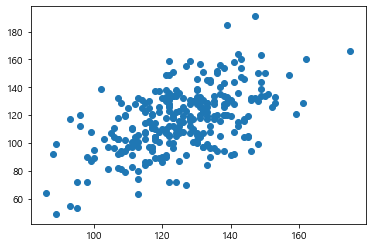

In [10]:
plt.scatter(data[var],data['Price'])

In [11]:
data[['CompPrice','Price']].corr()

,CompPrice,Price
CompPrice,1.000000,0.545333
Price,0.545333,1.000000


경쟁사 가격은 현재 상품 가격과 양의 상관관계를 가지기 때문에 선형 모델을 통해 예측으로 채우고자 한다.

In [12]:
comPrice_dataset = data[(data['CompPrice'].notnull())][['Price','CompPrice']]

x_train,x_test,y_train,y_test = train_test_split(comPrice_dataset['Price'], comPrice_dataset[var],test_size=0.2,random_state=2022)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
cv_score =cross_val_score(lr, x_train.values.reshape(-1,1),y_train, cv=3, scoring='r2')
print("r2 스코어 : ", cv_score.mean())

lr.fit(x_train.values.reshape(-1,1) ,y_train)

y_pred = lr.predict(x_test.values.reshape(-1,1))

r2_score(y_test,y_pred)

r2 스코어 :  0.25415318490516875


0.2611094863977237

채워보고, 판단하자.

In [13]:
data.loc[(data['CompPrice'].isnull()), "CompPrice"] = lr.predict(data[(data['CompPrice'].isnull())]["Price"].values.reshape(-1,1))

data.loc[(data['CompPrice'].isnull())]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


* Income 수입

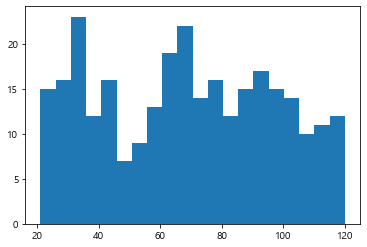

In [14]:
plt.hist(data["Income"],bins=20);

평균 수입인데 수입을 결정하는게 평균 학력이 아닐까 라는 생각에 학련별 수입의 평균을 구해 값을 채운다.

In [15]:
data_edu = data[["Education","Income"]].groupby("Education").mean().reset_index()
data_edu.columns = ['Education','Income_group']

# 그룹별로 nan값 채우기
data = data.merge(data_edu,on="Education",how='outer')

data.loc[data["Income"].isnull(),"Income"] = data['Income_group']

data.drop("Income_group",axis=1,inplace=True)

In [16]:
compPrice_mean = data["CompPrice"].mean()
Income_mean = data["Income"].mean()

In [17]:
# data["CompPrice"].fillna(compPrice_mean,inplace=True)
# data["Income"].fillna(Income_mean,inplace=True)

# test["CompPrice"].fillna(compPrice_mean,inplace=True)
# test["Income"].fillna(Income_mean,inplace=True)

In [18]:
# null 값이 존재하는지 확인
data.isna().sum().to_frame().T

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# null 값이 존재하는지 확인
# test.isna().sum().to_frame().T

Nan값 처리 완료.

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [20]:
col_int = data.select_dtypes(["int64",'float64']).columns

In [21]:
data.dtypes

Sales          float64
CompPrice      float64
Income         float64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [22]:
col_int = [c for c in col_int if c !='Sales']

In [23]:
ob_cols = data.select_dtypes("object")

In [24]:
data = pd.get_dummies(data,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.

In [27]:
data["Advertising_log"] = np.log1p(data["Advertising"])
test["Advertising_log"] = np.log1p(test["Advertising"])

data["Advertising_ox"] = 0
data.loc[data["Advertising_log"]> 0,"Advertising_ox"] = 1

# 가격 차이
data["diff"] = data['Price'] - data["CompPrice"]
test["diff"] = test['Price'] - test["CompPrice"]

### 2.5 데이터 분할
* train 데이터를 train : val 로 분할하시오.
* train set의 적절한 사이즈를 결정하시오.

In [28]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [29]:
x_train,x_vaild, y_train,y_vaild = train_test_split(x,y,test_size=0.3,random_state=2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [30]:
from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()
x_train[col_int] = mx.fit_transform(x_train[col_int])
x_vaild[col_int] = mx.transform(x_vaild[col_int])

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [31]:
# 모델 임포트
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# 모델 검증
from sklearn.model_selection import cross_val_score

# 모델 평가
from sklearn.metrics import mean_absolute_error,r2_score

# 정보 담기
result  = {}

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Linear Regression 모델링

In [32]:
model = LinearRegression()
def get_cv_score(model):
    cv_score =cross_val_score(model,x_train,y_train,cv=3,scoring='neg_mean_absolute_error') * -1
    return cv_score.mean()
result['LinearRegression'] = get_cv_score(model)
print(result['LinearRegression'])

0.9399174525541278


#### (2) Decision Tree 모델링

In [33]:
model = DecisionTreeRegressor()

result['DecisionTreeRegressor'] = get_cv_score(model)

#### (3) KNN 모델링

In [34]:
model = KNeighborsRegressor()
result['KNeighborsRegressor'] = get_cv_score(model)

#### (4) SVM 모델링

In [35]:
model = SVR()
result['SVR'] = get_cv_score(model)

#### (5) Random Forest 모델링

In [36]:
model = RandomForestRegressor()
result['RandomForestRegressor'] = get_cv_score(model)

#### (6) XGB 모델링

In [37]:
model = XGBRegressor()
result['XGBRegressor'] = get_cv_score(model)

* 단일 성능 결과

In [38]:
result_info = {}
for k,v in result.items():
    print(f"{k} : {round(v,3)}")
    result_info[k] = [v]

LinearRegression : 0.94
DecisionTreeRegressor : 1.915
KNeighborsRegressor : 1.827
SVR : 1.95
RandomForestRegressor : 1.318
XGBRegressor : 1.37


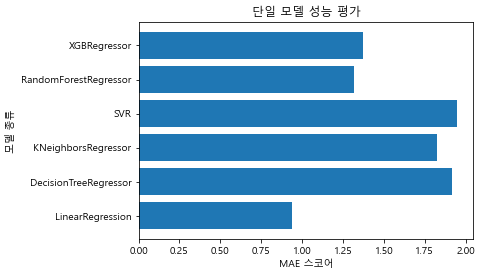

In [39]:
result_df = pd.DataFrame(result_info).T

plt.barh(width = result_df[0], y = result_df.index)
plt.title("단일 모델 성능 평가")

plt.xlabel("MAE 스코어")
plt.ylabel("모델 종류")

plt.show()

선형 모델과 랜덤포레스트, xgb가 mae가 낮다. 위 3개 모델에 대해서 최적의 파라미터를 찾아보자.

## 모델 최적화

### 선형 모델

In [40]:
from sklearn.model_selection import GridSearchCV,KFold
import numpy as np
new_result = {}

In [41]:
lr = LinearRegression()

feature_cols = x_train.columns

best_feature = []
best_score = np.inf
for c in feature_cols:
    feature = [m for m in feature_cols if m != c]
    cv_score =cross_val_score(model,x_train,y_train,cv=3,scoring='neg_mean_absolute_error') * -1
    if best_score > cv_score.mean():
        best_score = cv_score.mean()
        best_feature = feature

KeyboardInterrupt: 

In [ ]:
print("사용된 feature : ",best_feature)
print("이전 mae Score 성능 : ",round(result["LinearRegression"],3) ," -> 이후 mae Score 성능 : ", round(best_score,3))

In [42]:
new_result['LinearRegression'] = result["LinearRegression"]

선형 모델을 feature 중심으로 탐색을 했을때 성능이 나빠졌다. 그렇기에 모든 feature를 사용해야한다.

### Random Forest 모델링

In [ ]:
rf_model = RandomForestRegressor(random_state = 2022,criterion='absolute_error')

params = {
    'max_depth': range(3,6),
    'n_estimators': range(50,300,50),
    'min_samples_leaf':range(8,16,4)
    
}

model_rf = GridSearchCV(rf_model,params, cv=3, scoring='neg_mean_absolute_error')
model_rf.fit(x_train,y_train)

In [ ]:
print(model_rf.best_params_)
print("이전 MAE Score 성능 : ",round(result["RandomForestRegressor"],3) ," -> 이후 MAE Score 성능 : ", round(model_rf.best_score_,3) * -1)

In [43]:
new_result['RandomForestRegressor'] = result["RandomForestRegressor"]

###  XGB 모델링

In [44]:
xgb_model = XGBRegressor(random_state = 2022,)

params = {
    'max_depth': range(3,6),
    'n_estimators': range(50,200,50),
    'learning_rate': [0.2,0.1,0.05]
}

model_xgb = GridSearchCV(xgb_model,params, cv=3, scoring='neg_mean_absolute_error')
model_xgb.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2022, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [45]:
print(model_xgb.best_params_)
print("이전 MAE Score 성능 : ",round(result["XGBRegressor"],3) ," -> 이후 MAE Score 성능 : ", round(model_xgb.best_score_,3)*-1)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
이전 MAE Score 성능 :  1.37  -> 이후 MAE Score 성능 :  1.245


In [46]:
new_result['XGBRegressor'] = model_xgb.best_score_ * -1

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

* 모델1 

In [ ]:
clear_session()

il = Input( shape=(11,) )
hl = Dense(32, activation=relu)(il)
ol = Dense(1)(hl)

model1 = Model(il, ol)

model1.compile(loss='mae', metrics=['mae'],
              optimizer=Adam())
model1.summary()

* 모델2

In [ ]:
il = Input( shape=(11,) )
hl = Dense(32, activation=relu)(il)
hl = Dense(64, activation=relu)(hl)
hl = Dense(16, activation=relu)(hl)
ol = Dense(1)(hl)

model2 = Model(il, ol)

model2.compile(loss='mae', metrics=['mae'],
              optimizer=Adam())
model2.summary()

* 모델3

In [ ]:
il_1 = Input( shape=(2,) )
hl_1 = Dense(8, activation=relu)(il_1)

il_2 = Input( shape=(9,) )
hl_2 = Dense(32, activation=relu)(il_2)
hl_2 = Dense(32, activation=relu)(hl_2)
cl = Concatenate()([hl_1, hl_2])
hl = Dense(64, activation=relu)(cl)
hl = Dense(16, activation=relu)(hl)
ol = Dense(1)(hl)

model3 = Model([il_1, il_2], ol)

model3.compile(loss='mae', metrics=['mae'],
              optimizer=Adam())
model3.summary()

### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=3,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
history1 = model1.fit(x_train, y_train, validation_split=0.15,
          epochs=100, verbose=1, callbacks=[es])

In [ ]:
history2 =model2.fit(x_train, y_train, validation_split=0.15,
          epochs=100, verbose=1, callbacks=[es])

In [ ]:
price_col = ["Price","CompPrice"]

other_col = [c for c in x_train.columns if c not in price_col]

history3 = model3.fit([x_train[price_col], x_train[other_col]],y_train, validation_split=0.15,
          epochs=100, verbose=1, callbacks=[es])

In [ ]:
new_result['model1'] = min(history1.history["val_loss"])
new_result['model2'] = min(history2.history["val_loss"])
new_result['model3'] = min(history3.history["val_loss"])

## 5.성능 비교

* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

In [47]:
print("-----"*5)
print("평가 지표 : MAE")
print("-----"*5)
for k,v in new_result.items():
    print(f"{k} : {round(v,3)}")

-------------------------
평가 지표 : MAE
-------------------------
LinearRegression : 0.94
RandomForestRegressor : 1.318
XGBRegressor : 1.245


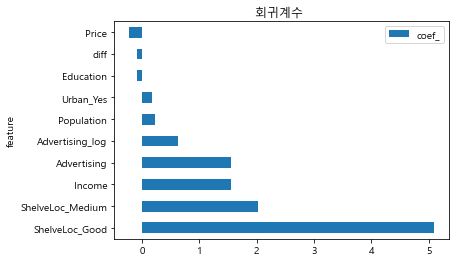

In [49]:
result_df = pd.DataFrame()
lr.fit(x_train,y_train)
result_df["feature"] = list(x_train)
result_df["coef_"] = lr.coef_
result_df.set_index("feature").sort_values("coef_",ascending=False)[:10].plot(kind="barh",title="회귀계수 ")
plt.show()

In [52]:
y_pred = lr.predict(x_vaild)
y_pred = model_xgb.predict(x_vaild)
# y_pred = model3.predict([x_vaild[price_col], x_vaild[other_col]])

In [53]:
print(r2_score(y_vaild,y_pred))

print(mean_absolute_error(y_vaild,y_pred))

0.8193120576139149
1.0760718208948767


LinearRegression이 MAE 평가 성능이 낮게 나오기 떄문에 좋다고 판단된다. 하지만, 이전 null값에 대해서 평균으로 변환했을때 결과보다 낮은 성능이 도출되었기 때문에, null값 처리에 대해 다시 판단할 이유가 있다. 그리고 판매액에 영향을 끼치는 요인 중 진열상태에 따라 판매액 영향을 끼치는 것으로 보여진다.

## 6.[팀과제]Test set으로 예측
* 전처리 코드 실행
* 예측
* 성능 튜닝 : Kaggle에서의 평가는 MAE로 하게 됩니다. 

#### 6.1 전처리 코드실행

* 주의!!! 
    * 전처리 코드는 2번에서의 순서를 반드시 지켜서 실행해야 합니다.
    * 중간에 오류가 나면, 순서가 맞지 않기때문에 발생될 수 있습니다. 


In [ ]:
# 가변수화 코드 실행


In [ ]:
# NAN 채우기


In [ ]:
# 경쟁사와 가격 차 변수 만들기


In [ ]:
# 스케일링


#### 6.2 예측

* 5에서 가장 좋은 성능의 모델로 예측을 시도합니다.
* 결과를 csv 파일로 저장해서 업로드 합니다.